In [43]:
import os

# Scientific and vector computation for python
import numpy as np
import pandas as pd
import datetime as dt
# Plotting library
from matplotlib import pyplot
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces
# tells matplotlib to embed plots within the notebook
%matplotlib inline

## Import data and plot

In [44]:
def plotData(x, y,txt1,txt2):

    fig = pyplot.figure()  # open a new figure
    
    
    #MEC stands for Mark Edge Color to define the Color of the broder of the data point for easy visibility     
    # ====================== YOUR CODE HERE ======================= 
    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    
    pyplot.xlabel(txt1)
    pyplot.ylabel(txt2)
    # =============================================================


In [45]:
dataIni = pd.read_csv("Data/house_data_complete.csv")

## Droping some Features

In [46]:

dataIni= dataIni.dropna(how='any',axis=0) 
dataIni.drop(['id'], axis=1, inplace=True)
#dataIni.drop(['zipcode'], axis=1, inplace=True)
#dataIni.drop(['lat'], axis=1, inplace=True)
#dataIni.drop(['long'], axis=1, inplace=True)
dataIni.drop(['date'], axis=1, inplace=True)
dataIni.describe()


print("number of NaN values for the column bedrooms :", dataIni['bedrooms'].isnull().sum())




number of NaN values for the column bedrooms : 0


## Splitting DataSet to Training, CV, Test

In [47]:
yIni=dataIni.values[:,0]
X_train, X_testCV, y_train, y_testCV = train_test_split(dataIni, yIni, test_size=0.4)
X_test, X_CV, y_test, y_CV = train_test_split(X_train, y_train, test_size=0.5)
dataIni.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Plotting Data

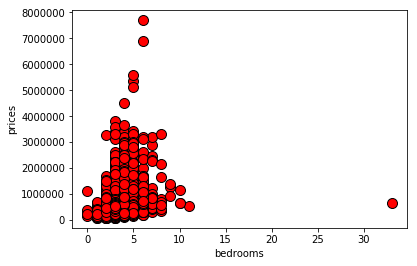

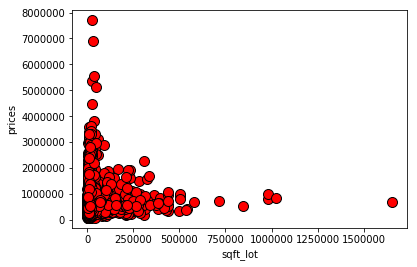

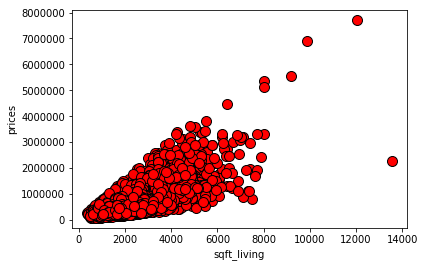

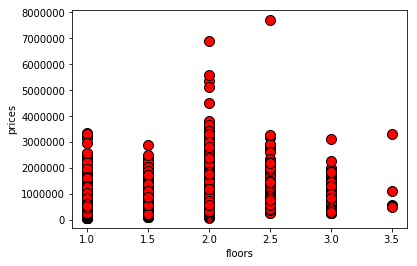

In [48]:

plotData(X_train['bedrooms'], X_train['price'],'bedrooms','prices')
plotData(X_train['sqft_lot'], X_train['price'],'sqft_lot','prices')
plotData(X_train['sqft_living'], X_train['price'],'sqft_living','prices')
plotData(X_train['floors'], X_train['price'],'floors','prices')


## Normalization Function

In [49]:
def  featureNormalize(X):

 
    # You need to set these values correctly
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])
    

    # =========================== YOUR CODE HERE =====================
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])
    mu=  np.mean(X, axis=0) 
    #print(X_norm)
    X_norm= X_norm- mu
    np.set_printoptions(suppress=True)
    sigma= np.std(X, axis=0)
    X_norm=X_norm/sigma
    

    # ================================================================
    return X_norm, mu, sigma

## Compute Cost function

In [50]:
def computeCostMulti(X, y, theta, lam):
   
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # You need to return the following variable correctly
    J = 0
    
    # ======================= YOUR CODE HERE ===========================
  
    J=0
    X_th=np.dot(X,theta)
    J= (1/(2*m))*np.dot((np.subtract(X_th,y)).T,np.subtract(X_th,y))+ (lam/2*m)*np.sum(theta)
    
    # ==================================================================
    return J


## Gradient Descent Function

In [51]:
def gradientDescentMulti(X, y, theta,lam, alpha, num_iters):
  
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # make a copy of theta, which will be updated by gradient descent
    theta = theta.copy()
    #print('From grad des theta:', theta.shape)
    #print('From grad des X:', X.shape)
    
    J_history = []
    
    for i in range(num_iters):
        # ======================= YOUR CODE HERE ==========================
        
        
        theta=theta *(1-(alpha*lam)/m) -(alpha/m)*(np.dot(X, theta)-y).dot(X)
        
        
        # =================================================================
        
        # save the cost J in every iteration
        #J_history.append(computeCostMulti(X, y, theta,lam))
        #print(theta)
        J_history.append(computeCostMulti(X, y, theta,lam))
    # Plot the convergence graph
    
    fig = pyplot.figure()
    pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
    
    pyplot.xlabel('Number of iterations')
    pyplot.ylabel('Cost J')

    # Display the gradient descent's result
    #print('theta computed from gradient descent: {:s}'.format(str(theta)))
    #np.set_printoptions(suppress=True)
    print('error of lamda=',lam)
    print(J_history[-1])
    
    return theta, J_history

## Training on Linear Hypothesis

In [52]:
X= X_train.values[:,1:]
y=X_train.values[:,0]

#print(X_train.describe())
X= np.array(X, dtype=np.float64)


X_norm, mu, sigma = featureNormalize(X)


#print('Computed mean:', mu)
#print('Computed standard deviation:', sigma)


In [53]:
m=y.size

X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

error of lamda= 10
79945114436.76819
error of lamda= 0.01
20451742341.53502
error of lamda= 0.0001
20392770102.56058
[array([540928.11343146, -29574.91172864,  29712.61929455,  81090.10075945,
         6190.18748683,   6824.44169959,  43237.57191061,  43333.29217478,
        19058.04613308, 110803.05479924,  76341.14821326,  25761.84046204,
       -74206.83787217,  11070.7246445 , -30150.72759522,  83292.74885024,
       -31893.78219676,  17230.8890367 , -10519.41027167]), array([541344.85343961, -29657.19263193,  29720.06544529,  81154.43693709,
         6196.99983047,   6805.30992696,  43259.17897715,  43336.46048354,
        19043.00393893, 110964.46579784,  76414.17967572,  25758.85690719,
       -74347.09537529,  11040.69437266, -30239.57737667,  83341.33612949,
       -31915.82007546,  17084.08191914, -10542.48617773]), array([541345.26674369, -29657.27430694,  29720.07287055,  81154.50081546,
         6197.00656877,   6805.29090341,  43259.20040172,  43336.46362313,
        1904

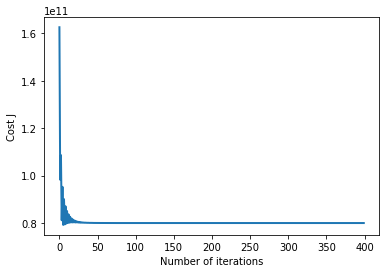

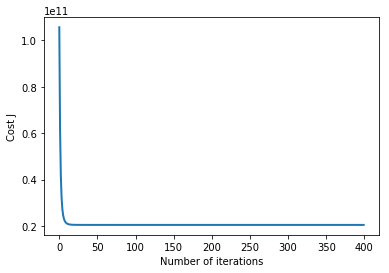

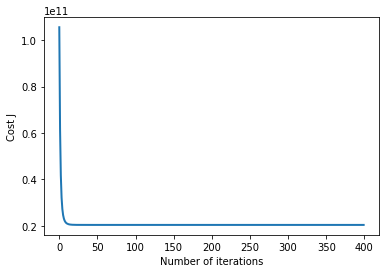

In [54]:
lamdas =[10,0.01,0.0001]
thetas= []
for lamda in lamdas:
    alpha = 0.35
    num_iters = 400
    #lam=lamdas[i]
    theta = np.zeros(X.shape[1])
    theta, J_history = gradientDescentMulti(X.copy(), y.copy(),theta.copy() ,lamda , alpha, num_iters)
    thetas.append(theta)
print(thetas)






## Cross Validation of linear hypothesis

In [55]:
X= X_CV.values[:,1:]
y=X_CV.values[:,0]
X= np.array(X, dtype=np.float64)
X_norm= (X -mu) /sigma
m=y.size
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
J_all=[]

for theta in thetas:
    
    J=0
    X_th=np.dot(X,theta)
    J= (1/(2*m))*np.dot((np.subtract(X_th,y)).T,np.subtract(X_th,y))
    J_all.append(J)

print(J_all)
index =J_all.index(min(J_all))

[20296695525.7582, 20294453605.89628, 20294451484.80435]


## Testing of Linear Hypothesis

In [56]:
X= X_test.values[:,1:]
y=X_test.values[:,0]
X= np.array(X, dtype=np.float64)
X_norm= (X -mu) /sigma
#X_norm, mu, sigma = featureNormalize(X)
m=y.size
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
theta= thetas[index]
X_th=np.dot(X,theta)
J= (1/(2*m))*np.dot((np.subtract(X_th,y)).T,np.subtract(X_th,y))
print(J)

20489912435.37614


## Training of Quadratic Hypothesis

error of lamda= 10
77350804909.66122


C:\Users\m\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]
C:\Users\m\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in subtract


error of lamda= 0.1
nan
error of lamda= 0.0001
nan
[array([510562.0988764 ,  -7097.2957482 ,  35621.97088943,  30007.69597227,
         6529.25065375,  14027.72748034,  43794.4162471 ,  37839.3270245 ,
        24112.27567926, 118348.7396395 ,  57597.295565  ,  26921.85672154,
       -64975.02192439,  16120.0283605 , -28439.49324788,  82829.7081674 ,
       -28754.03392023,  45102.60521412, -11186.62953494]), array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan]), array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan])]


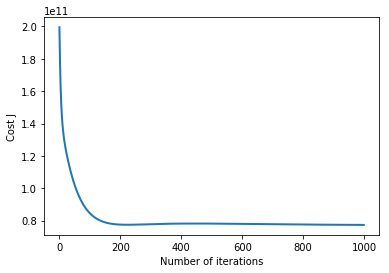

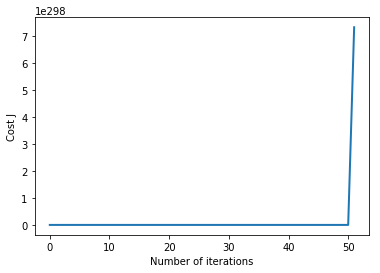

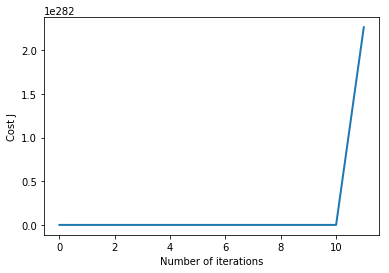

In [57]:
X= X_train.values[:,1:]
y=X_train.values[:,0]
X= np.array(X, dtype=np.float64)
X_norm, mu, sigma = featureNormalize(X)
m=y.size
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
lamdas =[10,0.1,0.0001]
thetas= []
for lamda in lamdas:
    alpha = 0.01
    num_iters = 1000
    #lam=lamdas[i]
    theta = np.zeros(X.shape[1])
    X[:,3] =np.power(X[:,3],2)
    theta, J_history = gradientDescentMulti(X, y.copy(),theta.copy() ,lamda , alpha, num_iters)
    thetas.append(theta)
print(thetas)








## Cross validation of Quadratic hypothesis

In [16]:
X= X_CV.values[:,1:]
y=X_CV.values[:,0]
X= np.array(X, dtype=np.float64)

X_norm= (X -mu) /sigma
m=y.size
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
J_all=[]

for theta in thetas:
    
    J=0
    X_th=np.dot(np.power(X,2),theta)
    J= (1/(2*m))*np.dot((np.subtract(X_th,y)).T,np.subtract(X_th,y))
    J_all.append(J)

print(J_all)
index =J_all.index(min(J_all))

[42244259195.26763, 42242282664.38931, 42242262721.90333]


## Testing of Quadratic function

In [17]:
X= X_test.values[:,1:]
y=X_test.values[:,0]
X= np.array(X, dtype=np.float64)

X_norm= (X -mu) /sigma
m=y.size
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
theta= thetas[index]
X_th=np.dot(np.power(X,2),theta)
J= (1/(2*m))*np.dot((np.subtract(X_th,y)).T,np.subtract(X_th,y))
print(J)

39584380778.84407


## Training of Cubic hypothesis

error of lamda= 10
141244852859.54733
error of lamda= 0.1
137391907457.89757
error of lamda= 0.0001
137353027656.087
[array([ 3720.84488734,    22.38351941,  2832.08134062,  5780.08371107,
          19.58591644,  2869.38342957,   111.18934029,  8858.48433426,
        4358.42096338,  6732.51316542,  6988.11061869,  4192.46350943,
       -1690.32118414,  5299.56509688,   881.60720816,  -220.39665069,
        2166.3508889 ,  7101.82287593,     2.3802453 ]), array([ 3720.85591523,    22.38350683,  2832.08503458,  5780.09071138,
          19.5859005 ,  2869.3917133 ,   111.18751332,  8858.50250997,
        4358.43363416,  6732.529625  ,  6988.1244102 ,  4192.46988254,
       -1690.32614914,  5299.57162881,   881.60979862,  -220.39727597,
        2166.35673009,  7101.84037294,     2.38008157]), array([ 3720.85602651,    22.38350671,  2832.08507186,  5780.09078202,
          19.58590034,  2869.39179689,   111.18749489,  8858.50269338,
        4358.43376202,  6732.52979109,  6988.12454937,  41

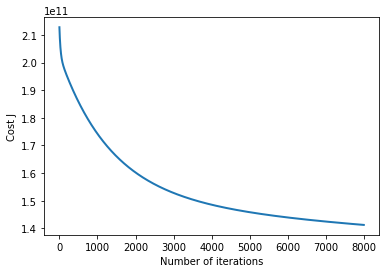

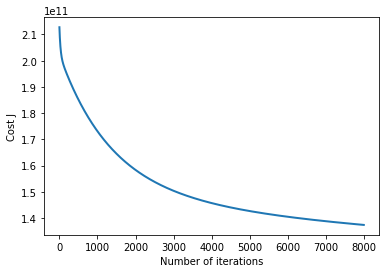

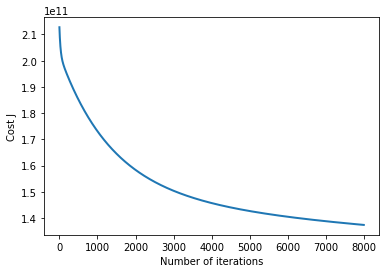

In [18]:
X= X_train.values[:,1:]
y=X_train.values[:,0]
X= np.array(X, dtype=np.float64)
X_norm, mu, sigma = featureNormalize(X)
m=y.size
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
lamdas =[10,0.1,0.0001]
thetas= []
for lamda in lamdas:
    alpha = 0.000001
    num_iters = 8000
    #lam=lamdas[i]
    theta = np.zeros(X.shape[1])
    theta, J_history = gradientDescentMulti(np.power(X.copy(),3), y.copy(),theta.copy() ,lamda , alpha, num_iters)
    thetas.append(theta)
print(thetas)


print(139424467849-137512324321)




## Cross Validation Cubic

In [19]:
X= X_CV.values[:,1:]
y=X_CV.values[:,0]
X= np.array(X, dtype=np.float64)

X_norm= (X -mu) /sigma
m=y.size
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
J_all=[]

for theta in thetas:
    
    J=0
    X_th=np.dot(np.power(X,3),theta)
    J= (1/(2*m))*np.dot((np.subtract(X_th,y)).T,np.subtract(X_th,y))
    J_all.append(J)

print(J_all)
index =J_all.index(min(J_all))

[139897418423.3432, 139897372492.5301, 139897372029.0476]


## Testing of Cubic function

In [20]:
X= X_test.values[:,1:]
y=X_test.values[:,0]
X= np.array(X, dtype=np.float64)

X_norm= (X -mu) /sigma
m=y.size
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
theta= thetas[index]
X_th=np.dot(np.power(X,3),theta)
J= (1/(2*m))*np.dot((np.subtract(X_th,y)).T,np.subtract(X_th,y))
print(J)

134808212976.49129


# K-fold on all hypothesis

hypothesis number : 1 fold: 1
error of lamda= 10
84243540639.76016
error of lamda= 0.1
19501506303.20506
error of lamda= 0.0001
18848051575.3124
[array([538308.58073269, -30099.6621533 ,  29219.79434917,  79091.84085256,
         3669.31389347,   4830.62767436,  48543.33020148,  40129.56662794,
        17468.47710537, 111685.1600025 ,  73747.50357144,  25542.48261555,
       -74702.07527793,   8814.11407536, -29457.16991644,  85445.34349226,
       -29089.40197266,  12985.48899193,  -8359.04967338]), array([538678.45982495, -30172.70449426,  29227.79656794,  79150.0271772 ,
         3668.86233804,   4810.15659845,  48565.9403744 ,  40131.64264422,
        17452.63326866, 111833.48990176,  73813.27201231,  25539.86935775,
       -74829.73656252,   8785.87373625, -29537.32379671,  85493.3457704 ,
       -29103.95647369,  12846.85773089,  -8374.45365837]), array([538682.19483174, -30173.44266935,  29227.87770516,  79150.61539089,
         3668.85753699,   4809.94939056,  48566.16862758,  

error of lamda= 10
171275570703.91403
error of lamda= 0.1
170068875029.4038


C:\Users\m\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


error of lamda= 0.0001
170056698369.3339
[array([ 510.58924443,   27.86900279,  972.40647246, 2206.68092267,
         24.24700003,  419.66170728,  819.56955213, 2425.16109154,
        632.38899606, 1413.51082463, 1872.83149653, 1485.00275389,
       -245.03326786, 2396.1650453 ,  138.26711108,  -33.04529644,
        359.48703485, 1448.63389314,   45.05252164]), array([ 510.58941785,   27.86900255,  972.40678549, 2206.68163194,
         24.24699954,  419.66184945,  819.56950622, 2425.16186071,
        632.38921086, 1413.51129078, 1872.8321104 , 1485.00322676,
       -245.03335018, 2396.16578575,  138.26715757,  -33.04530755,
        359.48715595, 1448.63437262,   45.05251525]), array([ 510.5894196 ,   27.86900255,  972.40678865, 2206.6816391 ,
         24.24699954,  419.66185089,  819.56950576, 2425.16186847,
        632.38921303, 1413.51129549, 1872.83211659, 1485.00323153,
       -245.03335101, 2396.16579322,  138.26715804,  -33.04530766,
        359.48715717, 1448.63437746,   45.0525

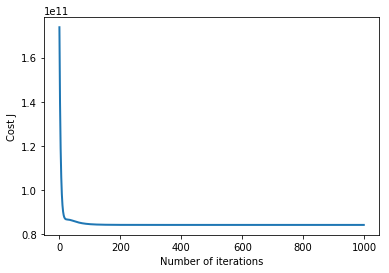

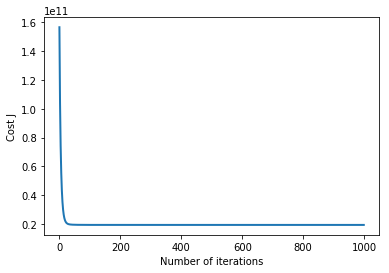

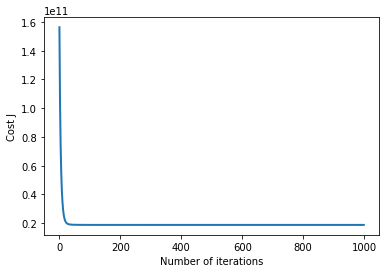

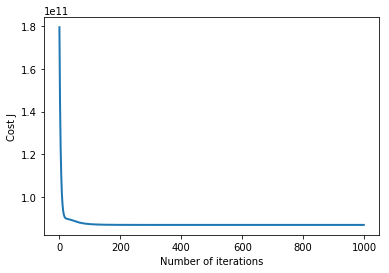

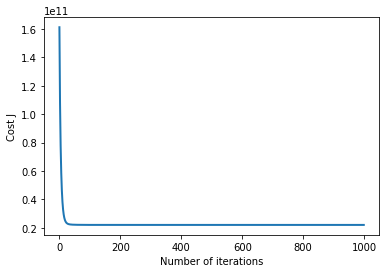

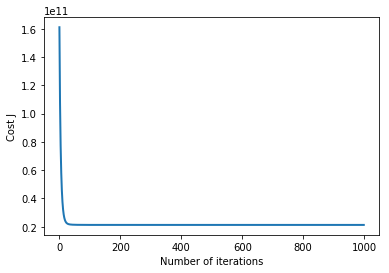

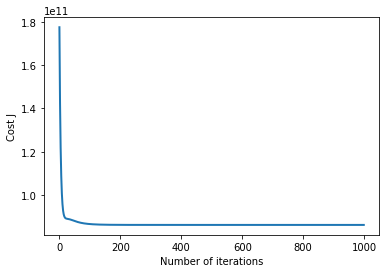

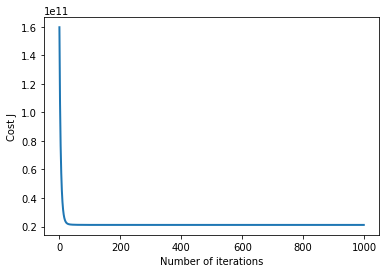

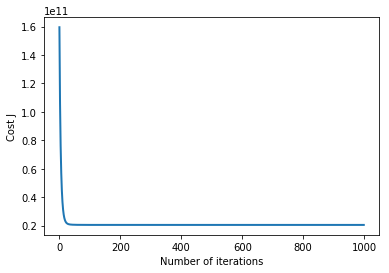

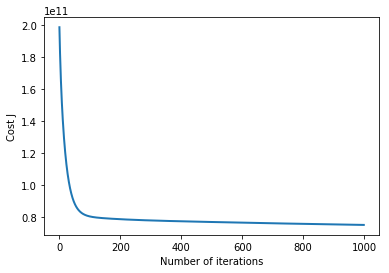

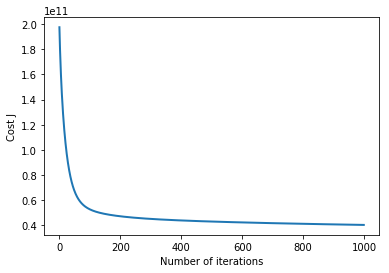

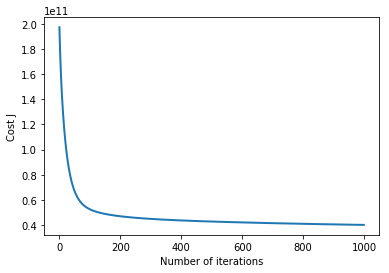

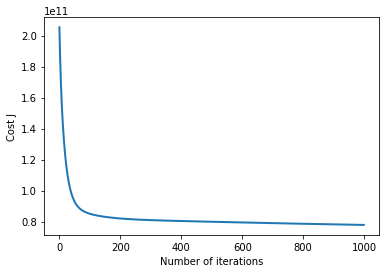

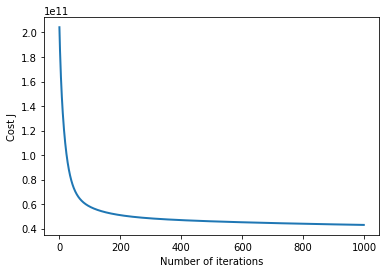

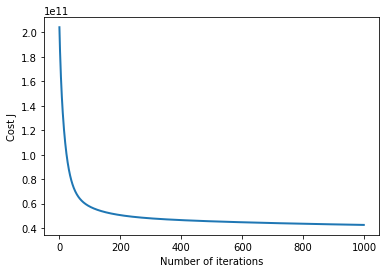

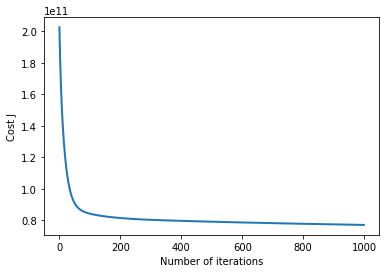

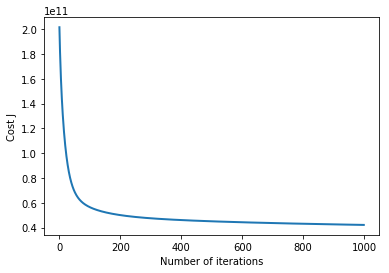

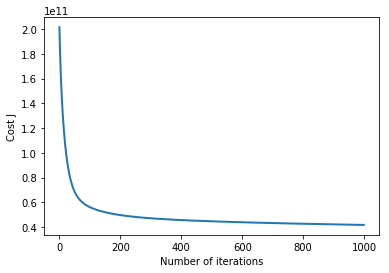

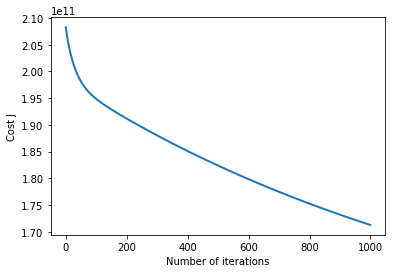

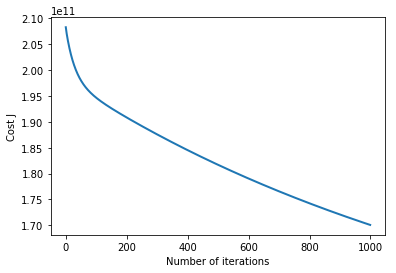

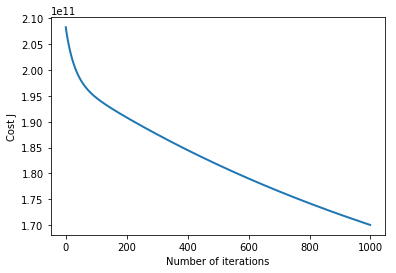

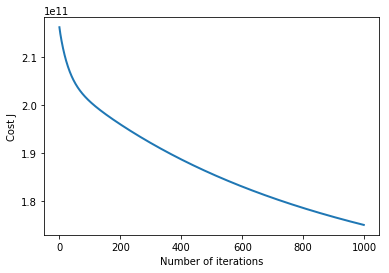

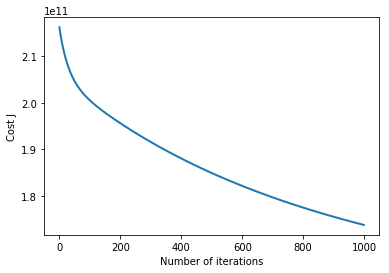

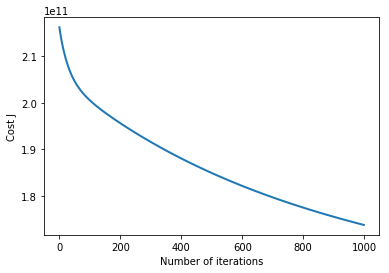

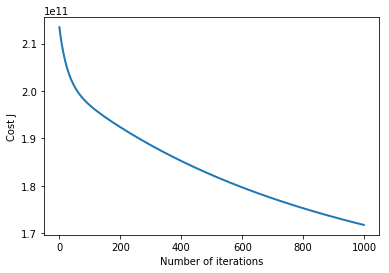

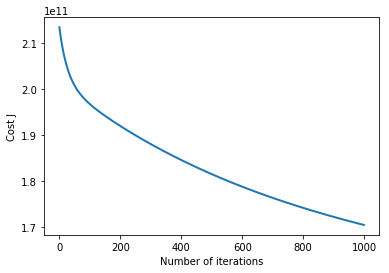

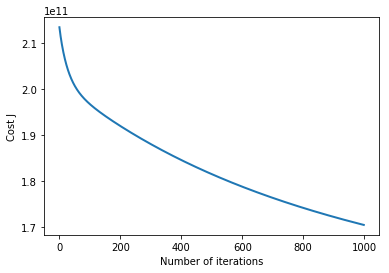

In [21]:
Data= dataIni.values

#print('Data size', Data.shape)
Data= np.array(Data, dtype=np.float64)


# prepare cross validation
kfold = KFold(3, True, 1)
Hyps_learningRates = [[0.1,1] , [0.001,2], [0.000001,3]]
for Hyp_learningRate in Hyps_learningRates:
    i=0
    for train, test in kfold.split(Data):
        i=i+1
        print('hypothesis number :',Hyp_learningRate[1],'fold:',i)
        #print(Data[train])
        #print('train: %s, test: %s' % (Data[train], Data[test]))
        X_train=Data[train][:,1:] #dah mn gheir el price
        y_train=Data[train][:,0] #price
        X_test, X_CV, y_test, y_CV = train_test_split(Data[test][:,1:],Data[test][:,0], test_size=0.5) #splitting el test

        #Training

        X_norm, mu, sigma = featureNormalize(X_train)
        m=y_train.size
        X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)


        lamdas =[10,0.1,0.0001]
        thetas= []
        for lamda in lamdas:
            alpha =  Hyp_learningRate[0]
            num_iters = 1000
            #lam=lamdas[i]
            theta = np.zeros(X.shape[1])
            theta, J_history = gradientDescentMulti(np.power(X,Hyp_learningRate[1]), y_train,theta.copy() ,lamda , alpha, num_iters)
            thetas.append(theta)
        print(thetas)

        #CV
        X_norm= (X_CV -mu) /sigma
        m=y_CV.size
        X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
        J_all=[]


        for theta in thetas:

            J=0
            X_th=np.dot(X,theta)
            J= (1/(2*m))*np.dot((np.subtract(X_th,y_CV)).T,np.subtract(X_th,y_CV))
            J_all.append(J)

        print('Printed error after CV:' ,J_all)
        index =J_all.index(min(J_all))

        #Testing



        X_norm= (X_test-mu) /sigma
        m=y_test.size
        X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
        theta= thetas[index]
        X_th=np.dot(X,theta)
        J_Test= (1/(2*m))*np.dot((np.subtract(X_th,y_test)).T,np.subtract(X_th,y_test))
        print('error of Testing:',J_Test)
        print('_________________________________________________________________________________________________________')




    
    
    